## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [209]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 ** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [210]:
print("Количество пропусков по каждой колонке:")
X.isna().sum()

Количество пропусков по каждой колонке:


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Видно, что в данном датасете нет ни пропусков, ни категориальных переменных


**Задача 1.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)

**Задача 1.3 ** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [213]:
X_train = X_train[['alcohol','magnesium']]
X_test = X_test[['alcohol','magnesium']]

In [214]:
from sklearn.preprocessing import StandardScaler

normalize = StandardScaler()
normalize.fit(X_train)
X_train = normalize.transform(X_train)
X_test = normalize.transform(X_test)

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


print(f"NN    Train    Test")

neighbors = [1,3,5,10,15,25]
for item in neighbors:
    kNN = KNeighborsClassifier(n_neighbors = item, metric='euclidean')
    kNN.fit(X_train, y_train)
    y_pred_train = kNN.predict(X_train)
    y_pred_test = kNN.predict(X_test)
    ac1= accuracy_score(y_train, y_pred_train).round(2)
    ac2= accuracy_score(y_test, y_pred_test).round(2)
    print(f"{item}     {ac1}    {ac2}")


NN    Train    Test
1     1.0    0.56
3     0.85    0.69
5     0.79    0.63
10     0.77    0.72
15     0.76    0.63
25     0.77    0.65


**Задача 1.4 ** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [216]:
# !pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [217]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

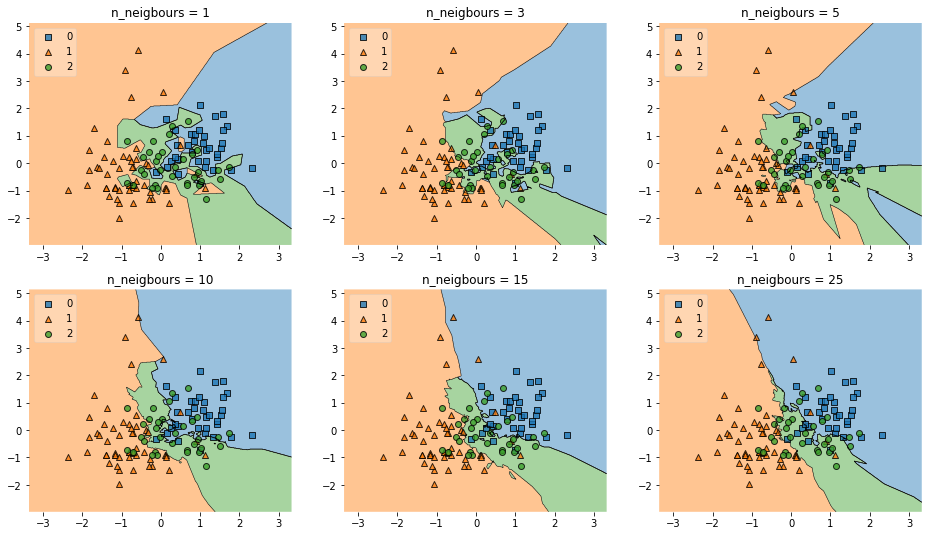

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.classifier import EnsembleVoteClassifier
# from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions



gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(16, 9))

kNN1 = KNeighborsClassifier(n_neighbors = 1)
kNN3 = KNeighborsClassifier(n_neighbors = 3)
kNN5 = KNeighborsClassifier(n_neighbors = 5)
kNN10 = KNeighborsClassifier(n_neighbors = 10)
kNN15 = KNeighborsClassifier(n_neighbors = 15)
kNN25 = KNeighborsClassifier(n_neighbors = 25)

labels = ['n_neigbours = 1','n_neigbours = 3','n_neigbours = 5',
          'n_neigbours = 10','n_neigbours = 15','n_neigbours = 25']

for clf, lab, grd in zip([kNN1, kNN3, kNN5, kNN10,kNN15,kNN25],
                         labels,itertools.product([0,1,2],repeat=2)): 
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y=y_train,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Как мне кажется, оптимальное число соседей для обучения в данном случае равно 5. Так как за исключением некоторых  выбросов решающая поверхность "захватывает" исключительно метки своего класса. 

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

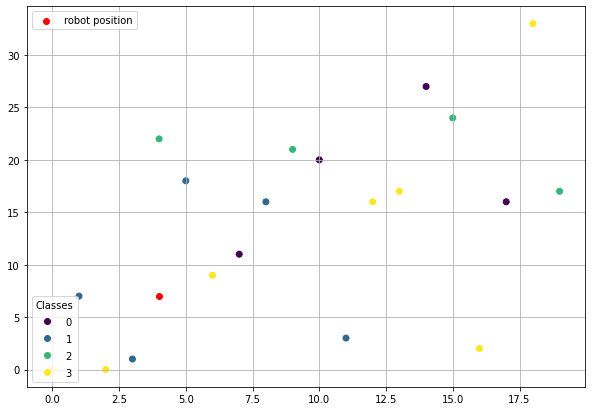

In [219]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [220]:
from sklearn.neighbors import KNeighborsClassifier

In [221]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = initial_position
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(k)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
        self.landmarks = landmarks
        self.initial_position = initial_position
        self.classes = classes
        
    def move(self):
        pred = self.knn.fit(self.landmarks,self.classes).predict([self.initial_position])
        if np.random.binomial(1, 0.2, 1) == 1:
            self.initial_position =self.initial_position +  self.mapping[0]
        else:    
            self.initial_position =self.initial_position +  self.mapping[pred[0]]
        self.trajectory = np.vstack((self.trajectory, self.initial_position))
        


**Задача 2.2 ** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [222]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

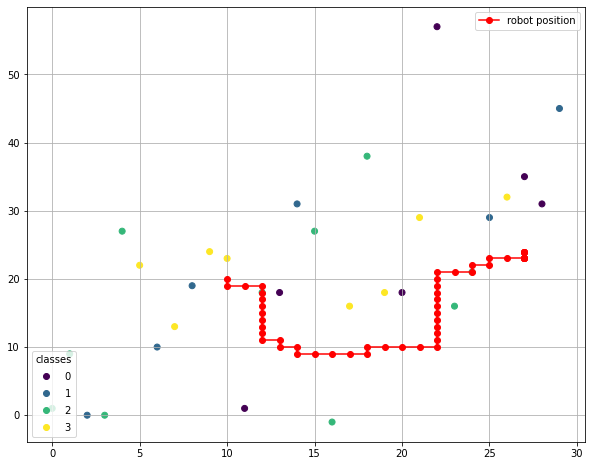

In [223]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

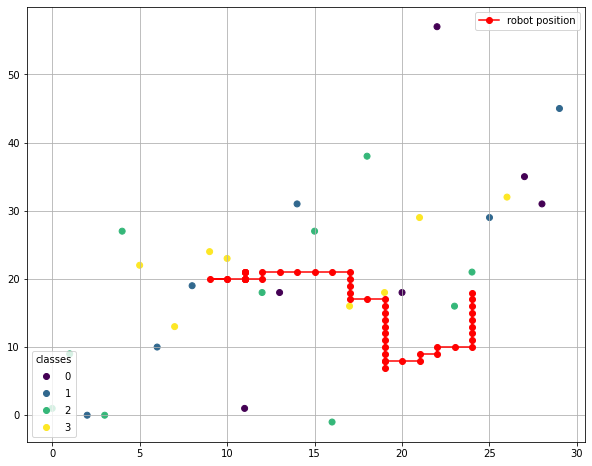

In [224]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

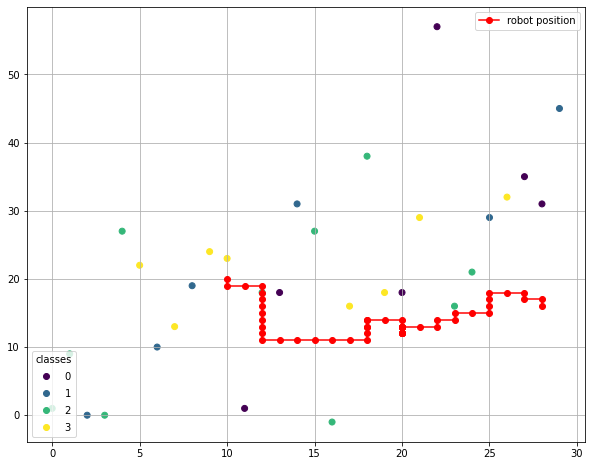

In [225]:
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

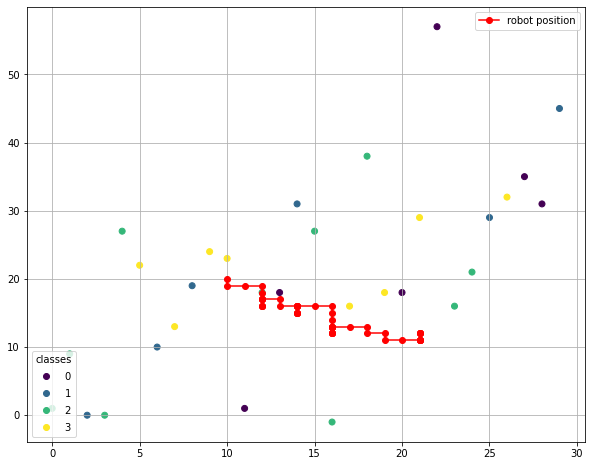

In [226]:
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)

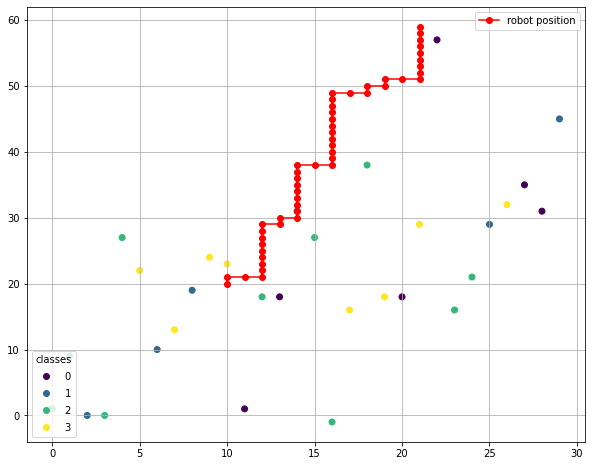

In [227]:
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

В зависимости от количества выбираемых соседей меняется траектория движения робота. Если бы метки были выбраны не случайно, то мы бы могли осознанно двигать "робота", по траектории, которая нам необходима. 

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [228]:
data = pd.read_csv('sample_data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [229]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [230]:
data.drop(data.columns[0], axis=1, inplace=True)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [231]:
data.corrwith(data['price'])

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
dtype: float64

Больше всего коррелируют с целевой переменной (price) признаки carat, x, y, z. 




**Задача 3.4** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [232]:
data_1 = pd.get_dummies(data[['color','clarity','cut']])
data.drop(['color','clarity','cut'],axis = 1,inplace=True)



data = data.merge(data_1,left_index=True,right_index=True) 

data.head(5)

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


**Задача 3.5** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [233]:
X = data.drop('price',axis=1)
y = data['price']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 3.6** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [235]:
scaled_features_train = X_train.copy()
scaled_features_test = X_test.copy()
col_names = ['carat','depth','table','x','y','z']

features_train = scaled_features_train[col_names]
features_test = scaled_features_test[col_names]

normalize.fit(features_train.values)
features_train = normalize.transform(features_train.values)
features_test = normalize.transform(features_test.values)

scaled_features_train[col_names] = features_train
scaled_features_test[col_names] = features_test

X_train = scaled_features_train.copy()
X_test = scaled_features_test.copy()


https://overcoder.net/q/3347092/применить-standardscaler-к-частям-набора-данных

**Задача 3.7** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression = LinearRegression()
regression.fit(X_train,y_train)
y_pred_train = regression.predict(X_train)
y_pred_test = regression.predict(X_test)
print("MSE train " ,mean_squared_error(y_train,y_pred_train))
print("MSE test  ",mean_squared_error(y_test,y_pred_test))

MSE train  1290541.9147450614
MSE test   1244765.4357158693


**Задача 3.8** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [237]:
coefs= pd.DataFrame(regression.coef_ ,X.columns)
coefs

,0
carat,5338.615671
depth,-90.173817
table,-60.332280
x,-1100.418850
y,-6.458917
z,-34.258945
color_D,835.314553
color_E,618.285586
color_F,562.010577
color_G,335.154315


Коэффициенты при признаках "carat" и "x" напорядок больше остальных. 

**Задача 3.9** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [238]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10)
lasso.fit(X_train,y_train)
coefs= pd.DataFrame(lasso.coef_ ,X.columns, columns=['coef'])
coefs

,coef
carat,4853.419321
depth,-100.465793
table,-80.371975
x,-696.805907
y,-0.000000
z,-32.599823
color_D,350.361862
color_E,176.452607
color_F,131.487257
color_G,0.000000


In [239]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)
coefs_1= pd.DataFrame(ridge.coef_ ,X.columns, columns=['coef'])
coefs_1

,coef
carat,5298.926724
depth,-88.822846
table,-60.804550
x,-1058.745121
y,-9.051731
z,-37.405248
color_D,830.398469
color_E,614.575881
color_F,558.387548
color_G,333.496909


Веса уменьшились напорядок. При Lasso-регресии некоторые даже занулились. Это говорит о наличии коллинеарности, но как мы видим по полученным коэффициентам, она не очень сильно проявлялась. 

**Задача 3.10** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75484057.68232727, tolerance: 60605526.52466702
  positive)


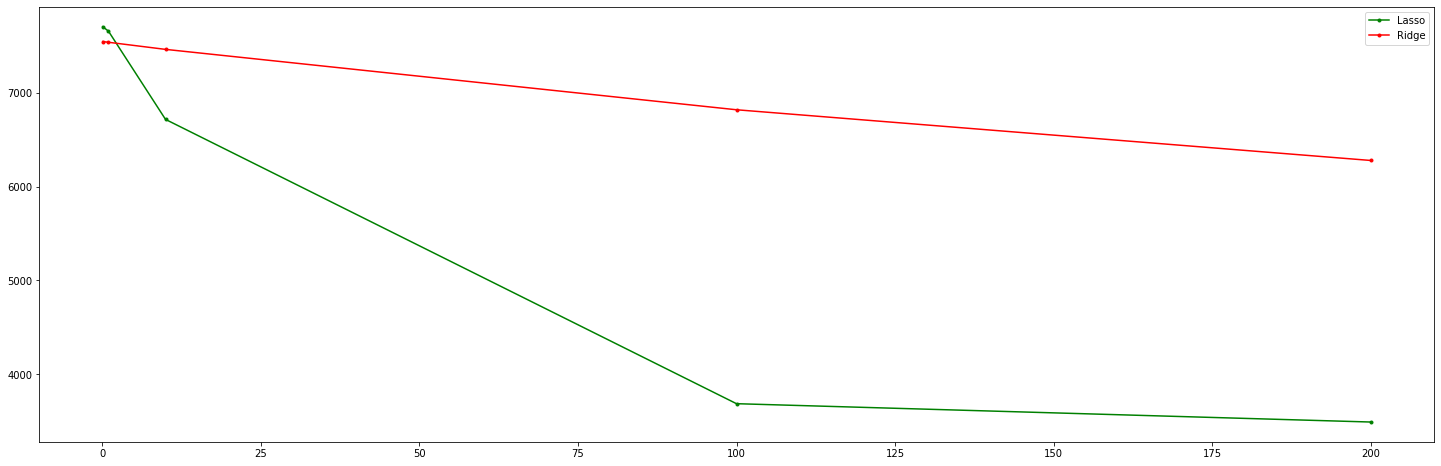

In [240]:
alphas = [0.1, 1, 10, 100, 200]
weights_lasso = []
weights_ridge = []
for item in alphas:
    lasso = Lasso(alpha=item)
    ridge = Ridge(alpha=item)
    lasso.fit(X_train,y_train)
    ridge.fit(X_train,y_train)
    weights_lasso.append(np.linalg.norm(lasso.coef_))
    weights_ridge.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(25,8))
plt.plot(alphas,weights_lasso,c='g',label ='Lasso',marker ='.')
plt.plot(alphas,weights_ridge,c='r',label ='Ridge',marker ='.')
plt.legend()
plt.show()

По графику видно, что Lasso-регресиия агрессивнее уменьшает веса. Этой регрессией пользуются для отбора признаков, так как она может занулять веса имеющие небольшое влияние на предсказание. 

**Задача 3.11** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [241]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV (alphas = np.array([0.1, 1, 10, 100, 200]),cv=5)
lassoCV.fit(X_train,y_train)
means=lassoCV.mse_path_.mean(axis=0)
means_alpha = pd.DataFrame(means.reshape(1,5),columns=lassoCV.alphas_)
means_alpha


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511668948.14608765, tolerance: 48476565.465277866
  tol, rng, random, positive)


,200.0,100.0,10.0,1.0,0.1
0,1.783077e+06,1.736672e+06,1.755099e+06,1.673513e+06,1.680287e+06


**Задача 3.12** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [242]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
pd.DataFrame(lasso.coef_,X.columns, columns=['coef'])


,coef
carat,5290.024643
depth,-91.210260
table,-62.196110
x,-1061.663539
y,-3.486381
z,-34.621616
color_D,485.580877
color_E,272.764863
color_F,217.598043
color_G,0.000000


Самые информативные признаки: carat, x и clarity. 
Самые неиформативные : y, z и cut. 
Очевидно, что вес бриллианта, частота и его длина очень сильно влияют на цену. В том время как огранка не особо влияют на цену. Что касается y, z, их влияние незначительно, так как они прями пропорциональны x. 

**Задача 3.13** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [243]:
y_pred = lasso.predict(X_test)
print("MSE test ",mean_squared_error(y_test,y_pred))

MSE test  1244173.0172983494


Ненамного, но Lasso-регрессия показывает лучшую ошибку. Мне кажется, это происходит потому, что Lasso-регрессия зануляет и уменьшает веса неинформативных признаков. Я думаю, если бы я избавился от выбросов, то ошибка снизилась еще больше. 